In [377]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [378]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [380]:
!pip install opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [381]:
import cv2

In [382]:
pimg = '/content/drive/MyDrive/Dataset/Train/Parasite/C133P94ThinF_IMG_20151004_155721_cell_111.png'
uimg = '/content/drive/MyDrive/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_115.png'

In [383]:
image = cv2.imread(pimg)
image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Text(0.5, 1.0, 'Affected')

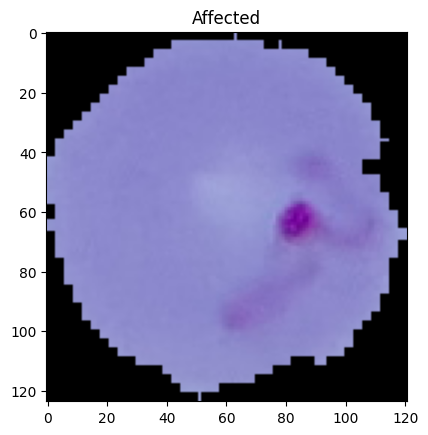

In [384]:
plt.imshow(image)
plt.title('Affected')

Text(0.5, 1.0, 'Uninfected')

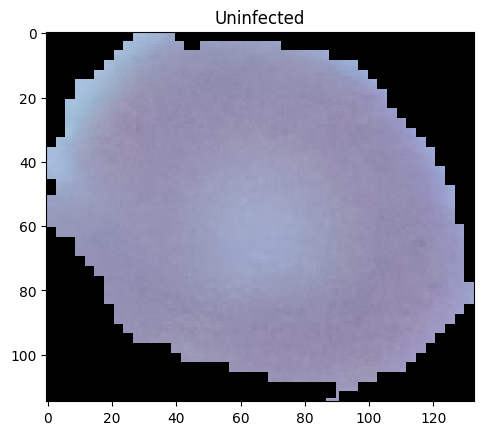

In [385]:
plt.imshow(cv2.imread(uimg))
plt.title('Uninfected')

In [386]:
import os
directory = '/content/drive/MyDrive/Dataset'
files = os.listdir(directory)
len(files)

2

In [387]:
train_path = directory +'/Train'
test_path = directory + '/Test'

In [388]:
os.listdir(train_path+'/Parasite')[0]

'C133P94ThinF_IMG_20151004_155721_cell_114.png'

In [389]:
os.listdir(directory)

['Train', 'Test']

In [390]:
len(os.listdir(train_path+'/Parasite'))

220

In [391]:
len(os.listdir(train_path+'/Uninfected'))

196

In [392]:
len(os.listdir(test_path+'/Parasite'))

101

In [393]:
len(os.listdir(test_path+'/Uninfected'))

43

In [394]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'/Uninfected'):
    img=cv2.imread(test_path+'/Uninfected/'+image_filename)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [395]:
dim1



[112,
 130,
 115,
 130,
 121,
 127,
 136,
 106,
 115,
 136,
 100,
 115,
 130,
 112,
 115,
 97,
 130,
 121,
 142,
 106,
 109,
 112,
 127,
 106,
 127,
 124,
 133,
 112,
 124,
 130,
 121,
 118,
 100,
 112,
 100,
 103,
 124,
 130,
 115,
 121,
 124,
 154,
 145]

In [396]:
np.mean(dim1)

120.16279069767442

In [397]:
np.mean(dim2)

114.72093023255815

In [398]:
height = 128
width = 128

In [399]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [400]:
trainDatagen = datagen.flow_from_directory(directory=train_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 333 images belonging to 2 classes.


In [401]:
valDatagen = datagen.flow_from_directory(directory=test_path,
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 28 images belonging to 2 classes.


# CNN - Layers


In [402]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [403]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 30, 30, 32)       

In [404]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [405]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [406]:
result=model.fit(trainDatagen,epochs=10,validation_data=valDatagen)

Epoch 1/10
21/21 [==============================] - 4s 79ms/step - loss: 0.7781 - accuracy: 0.4775 - val_loss: 0.6880 - val_accuracy: 0.7143
Epoch 2/10
21/21 [==============================] - 82s 4s/step - loss: 0.6914 - accuracy: 0.5405 - val_loss: 0.6908 - val_accuracy: 0.7857
Epoch 3/10
21/21 [==============================] - 1s 60ms/step - loss: 0.6838 - accuracy: 0.5405 - val_loss: 0.6967 - val_accuracy: 0.3214
Epoch 4/10
21/21 [==============================] - 1s 53ms/step - loss: 0.6857 - accuracy: 0.5465 - val_loss: 0.6950 - val_accuracy: 0.3929
Epoch 5/10
21/21 [==============================] - 1s 47ms/step - loss: 0.6844 - accuracy: 0.5556 - val_loss: 0.6952 - val_accuracy: 0.3929
Epoch 6/10
21/21 [==============================] - 1s 46ms/step - loss: 0.6627 - accuracy: 0.6246 - val_loss: 0.7155 - val_accuracy: 0.3929
Epoch 7/10
21/21 [==============================] - 1s 46ms/step - loss: 0.6772 - accuracy: 0.5796 - val_loss: 0.6769 - val_accuracy: 0.5000
Epoch 8/10
21/

In [407]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

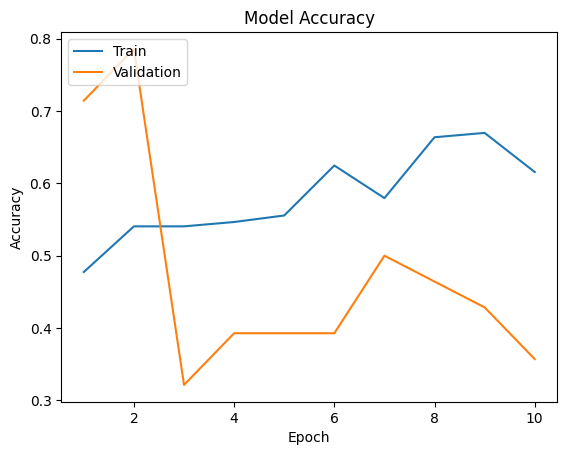

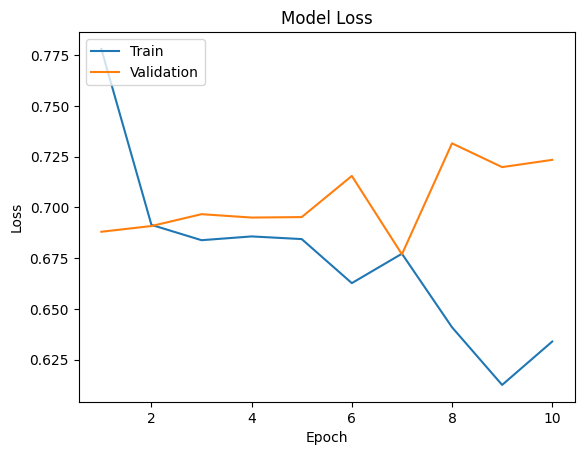

In [408]:
plotLearningCurve(result,10)

In [409]:

from sklearn.metrics import classification_report,confusion_matrix

In [410]:
model.metrics_names

['loss', 'accuracy']

In [411]:
pred=model.predict(valDatagen)

2/2 [==============================] - 0s 27ms/step


In [412]:
predictions=pred>0.5

In [413]:
predictions

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [414]:
valDatagen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [415]:
print(classification_report(valDatagen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        20
           1       0.17      0.38      0.23         8

    accuracy                           0.29        28
   macro avg       0.33      0.31      0.28        28
weighted avg       0.40      0.29      0.30        28



In [416]:
acc = []
preciss= []

In [417]:
from sklearn.metrics import precision_score, accuracy_score

In [418]:
predictions = predictions.astype(int)
predict_labels = predictions.flatten()
prec_score = precision_score(valDatagen.classes, predict_labels)
preciss.append(prec_score)
accuracy= accuracy_score(valDatagen.classes, predict_labels)
acc.append(accuracy)





In [419]:
print(acc)
print(preciss)

[0.2857142857142857]
[0.16666666666666666]


In [420]:
valDatagen.classes[0]


0

In [421]:
predictions[0]


array([1])

# VGG16

In [422]:
from tensorflow.keras.applications.vgg16 import VGG16

In [423]:
training_set = datagen.flow_from_directory(directory=train_path,
                                           target_size=(224,224),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           )

Found 416 images belonging to 2 classes.


In [424]:
test_set =  datagen.flow_from_directory(directory=test_path,
                                           target_size=(224,224),
                                           class_mode = 'categorical',
                                           batch_size = 32,
                                           )

Found 144 images belonging to 2 classes.


In [425]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [426]:
import tensorflow.keras as keras
from tensorflow.keras.models import Model

In [427]:
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


In [428]:
for layer in base_model.layers:
    layer.trainable = False

In [429]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [430]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [431]:
result1=model.fit(training_set,epochs = 10,validation_data=test_set)

Epoch 1/10
13/13 [==============================] - 5s 221ms/step - loss: 0.6801 - accuracy: 0.4928 - val_loss: 0.6007 - val_accuracy: 0.7014
Epoch 2/10
13/13 [==============================] - 2s 176ms/step - loss: 0.5951 - accuracy: 0.8197 - val_loss: 0.6075 - val_accuracy: 0.7708
Epoch 3/10
13/13 [==============================] - 3s 228ms/step - loss: 0.5576 - accuracy: 0.7981 - val_loss: 0.5551 - val_accuracy: 0.7292
Epoch 4/10
13/13 [==============================] - 5s 420ms/step - loss: 0.5130 - accuracy: 0.8149 - val_loss: 0.5210 - val_accuracy: 0.7222
Epoch 5/10
13/13 [==============================] - 3s 250ms/step - loss: 0.4874 - accuracy: 0.7885 - val_loss: 0.5183 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 4s 273ms/step - loss: 0.4443 - accuracy: 0.8293 - val_loss: 0.5093 - val_accuracy: 0.7917
Epoch 7/10
13/13 [==============================] - 3s 248ms/step - loss: 0.4011 - accuracy: 0.8798 - val_loss: 0.4692 - val_accuracy: 0.8194
Epoch 

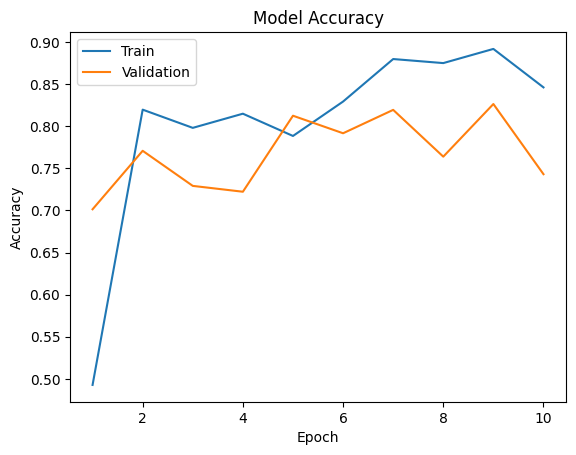

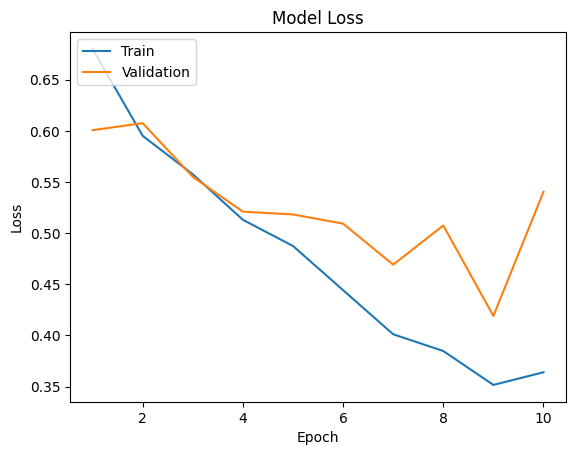

In [432]:
plotLearningCurve(result1,10)

In [433]:
predict = model.predict(test_set)
predict

5/5 [==============================] - 1s 130ms/step


array([[0.6837905 , 0.3162095 ],
       [0.57602847, 0.42397153],
       [0.43780714, 0.56219286],
       [0.957881  , 0.042119  ],
       [0.7566984 , 0.24330162],
       [0.6703022 , 0.32969782],
       [0.3584328 , 0.64156723],
       [0.19235504, 0.8076449 ],
       [0.38129166, 0.6187084 ],
       [0.5502854 , 0.4497146 ],
       [0.6703022 , 0.32969782],
       [0.18305321, 0.81694674],
       [0.25153163, 0.7484684 ],
       [0.64829963, 0.3517004 ],
       [0.37809741, 0.6219026 ],
       [0.40360984, 0.5963901 ],
       [0.79112166, 0.20887832],
       [0.32793975, 0.67206025],
       [0.938391  , 0.06160903],
       [0.5450969 , 0.45490316],
       [0.34202722, 0.65797275],
       [0.18804048, 0.8119595 ],
       [0.5957473 , 0.40425268],
       [0.13198443, 0.8680155 ],
       [0.19294183, 0.8070582 ],
       [0.5608838 , 0.43911618],
       [0.42456365, 0.57543635],
       [0.24092177, 0.7590782 ],
       [0.8125411 , 0.18745883],
       [0.17403689, 0.8259631 ],
       [0.

In [434]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [435]:
test_set.classes[0]

0

In [436]:
import  numpy as np
preddict = np.argmax(predict,axis = 1)
preddict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [437]:
print(classification_report(test_set.classes,preddict))

              precision    recall  f1-score   support

           0       0.69      0.44      0.53       101
           1       0.29      0.53      0.37        43

    accuracy                           0.47       144
   macro avg       0.49      0.49      0.45       144
weighted avg       0.57      0.47      0.49       144



In [438]:
preddict = preddict.astype(int)
predict_labels = preddict.flatten()
prec_score = precision_score(test_set.classes, preddict)
preciss.append(prec_score)
accuracy= accuracy_score(test_set.classes, predict_labels)
acc.append(accuracy)


# Resnet


In [441]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [442]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))




In [443]:
x = base_model.output
x

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [444]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [445]:
model = Model(inputs=base_model.input, outputs=predictions)

In [446]:
for layer in base_model.layers:
    layer.trainable = False

In [447]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_17[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [448]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [449]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_dir = train_path
test_dir = test_path


batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')




Found 416 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [450]:

result = model.fit(train_generator,
          epochs=10,
          validation_data=test_generator)

Epoch 1/10
13/13 [==============================] - 11s 604ms/step - loss: 0.7992 - accuracy: 0.5144 - val_loss: 0.6928 - val_accuracy: 0.5139
Epoch 2/10
13/13 [==============================] - 6s 450ms/step - loss: 0.7508 - accuracy: 0.4928 - val_loss: 0.6038 - val_accuracy: 0.7014
Epoch 3/10
13/13 [==============================] - 7s 539ms/step - loss: 0.7250 - accuracy: 0.5264 - val_loss: 0.6097 - val_accuracy: 0.7014
Epoch 4/10
13/13 [==============================] - 6s 451ms/step - loss: 0.6977 - accuracy: 0.4760 - val_loss: 0.6740 - val_accuracy: 0.7083
Epoch 5/10
13/13 [==============================] - 7s 547ms/step - loss: 0.6814 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.4167
Epoch 6/10
13/13 [==============================] - 6s 449ms/step - loss: 0.6796 - accuracy: 0.5625 - val_loss: 0.7493 - val_accuracy: 0.3472
Epoch 7/10
13/13 [==============================] - 6s 450ms/step - loss: 0.6927 - accuracy: 0.5192 - val_loss: 0.6436 - val_accuracy: 0.7986
Epoch

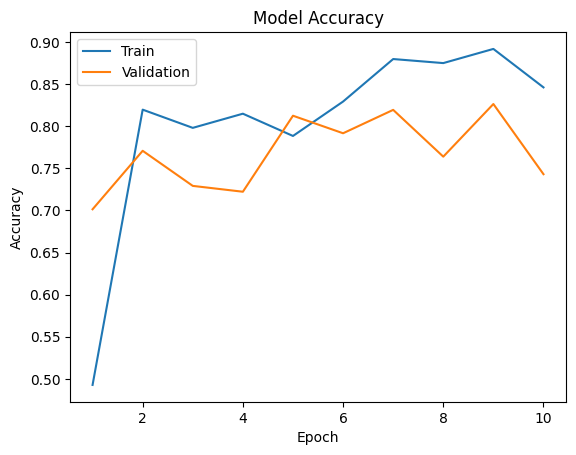

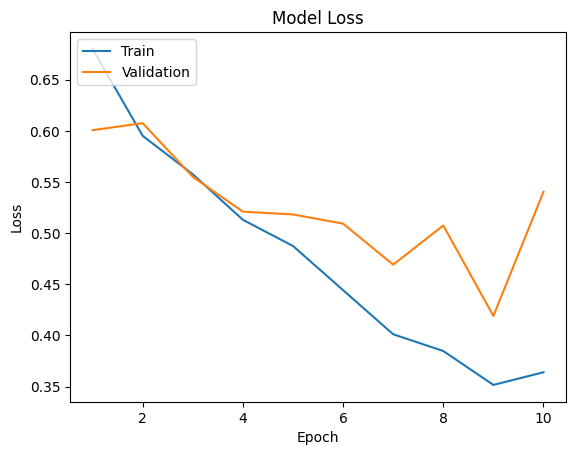

In [451]:
plotLearningCurve(result1,10)

In [452]:
predict = model.predict(test_generator)
predict

5/5 [==============================] - 1s 106ms/step


array([[0.73420477],
       [0.7682435 ],
       [0.78307766],
       [0.79886186],
       [0.75007755],
       [0.74899864],
       [0.73526734],
       [0.5145874 ],
       [0.79579586],
       [0.77438474],
       [0.72618324],
       [0.7623758 ],
       [0.7564603 ],
       [0.7459563 ],
       [0.77029204],
       [0.7492827 ],
       [0.7764201 ],
       [0.74116075],
       [0.77987134],
       [0.73394656],
       [0.7335965 ],
       [0.7879724 ],
       [0.800204  ],
       [0.76015687],
       [0.7510113 ],
       [0.7583489 ],
       [0.7551834 ],
       [0.81101006],
       [0.70495933],
       [0.6871996 ],
       [0.77972215],
       [0.67967474],
       [0.82586557],
       [0.79207826],
       [0.75196785],
       [0.69401985],
       [0.7453212 ],
       [0.78152806],
       [0.763246  ],
       [0.7972421 ],
       [0.73814875],
       [0.7713968 ],
       [0.7509469 ],
       [0.7623758 ],
       [0.57551146],
       [0.7829512 ],
       [0.7509514 ],
       [0.784

In [453]:
preddict = predict>0.5
preddict = preddict.astype(int)
predict_labels = preddict.flatten()
predict_labels



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [454]:
len(test_generator.classes)

144

In [455]:
print(classification_report(test_generator.classes,predict_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.30      1.00      0.46        43

    accuracy                           0.30       144
   macro avg       0.15      0.50      0.23       144
weighted avg       0.09      0.30      0.14       144



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [456]:
prec_score = precision_score(test_generator.classes, predict_labels)
preciss.append(prec_score)
accuracy= accuracy_score(test_generator.classes, predict_labels)
acc.append(accuracy)


# MobileNetV2

In [457]:
from tensorflow.keras.applications import MobileNetV2

In [458]:
mobilenet = Sequential()

In [459]:
pretrained_model  = tf.keras.applications.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights="imagenet",
    

)

In [460]:
for layers in pretrained_model.layers:
  layers.trainable = False


In [461]:
mobilenet.add(pretrained_model)
mobilenet.add(Flatten())
mobilenet.add(Dense(128,activation = 'relu'))
mobilenet.add(Dense(1,activation = 'softmax'))

In [462]:
mobilenet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_32 (Dense)            (None, 128)               6422656   
                                                                 
 dense_33 (Dense)            (None, 1)                 129       
                                                                 
Total params: 9,651,649
Trainable params: 6,422,785
Non-trainable params: 3,228,864
_________________________________________________________________


In [463]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [464]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = train_path
test_dir = test_path


batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 416 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [465]:
result = model.fit(train_generator,
          epochs=10,
          validation_data=test_generator)

Epoch 1/10
13/13 [==============================] - 12s 617ms/step - loss: 0.7205 - accuracy: 0.5601 - val_loss: 0.6777 - val_accuracy: 0.4306
Epoch 2/10
13/13 [==============================] - 6s 454ms/step - loss: 0.6885 - accuracy: 0.5312 - val_loss: 0.7905 - val_accuracy: 0.3472
Epoch 3/10
13/13 [==============================] - 7s 544ms/step - loss: 0.6611 - accuracy: 0.6154 - val_loss: 0.7605 - val_accuracy: 0.3611
Epoch 4/10
13/13 [==============================] - 6s 460ms/step - loss: 0.6708 - accuracy: 0.5721 - val_loss: 0.8274 - val_accuracy: 0.3472
Epoch 5/10
13/13 [==============================] - 7s 527ms/step - loss: 0.6601 - accuracy: 0.5793 - val_loss: 0.8358 - val_accuracy: 0.3472
Epoch 6/10
13/13 [==============================] - 6s 461ms/step - loss: 0.6766 - accuracy: 0.5793 - val_loss: 0.8487 - val_accuracy: 0.3472
Epoch 7/10
13/13 [==============================] - 7s 517ms/step - loss: 0.6757 - accuracy: 0.5553 - val_loss: 0.6445 - val_accuracy: 0.6319
Epoch

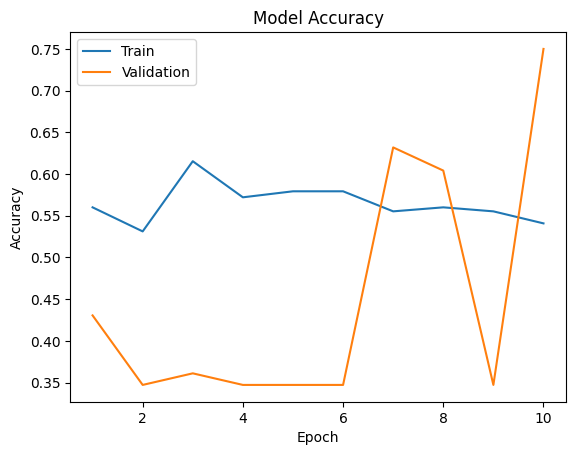

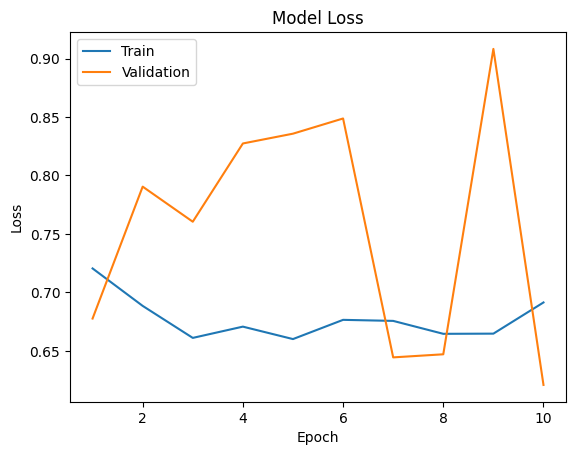

In [466]:
plotLearningCurve(result,10)

In [467]:
predict = model.predict(test_generator)
preddict = predict > 0.5
preddict = preddict.astype(int)
predict_labels = preddict.flatten()

5/5 [==============================] - 2s 164ms/step


In [468]:
print(classification_report(test_generator.classes,predict_labels))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       101
           1       0.29      0.35      0.32        43

    accuracy                           0.56       144
   macro avg       0.50      0.50      0.49       144
weighted avg       0.58      0.56      0.57       144



In [469]:

prec_score = precision_score(test_generator.classes, predict_labels)
preciss.append(prec_score)
accuracy= accuracy_score(test_generator.classes, predict_labels)
acc.append(accuracy)


In [470]:
print(acc)
print(preciss)

[0.2857142857142857, 0.4652777777777778, 0.2986111111111111, 0.5555555555555556]
[0.16666666666666666, 0.2875, 0.2986111111111111, 0.29411764705882354]


In [471]:
import pandas as pd
df = pd.DataFrame({'Accuracy': acc, 'Precision': preciss})

In [472]:
df

,Accuracy,Precision
0,0.285714,0.166667
1,0.465278,0.287500
2,0.298611,0.298611
3,0.555556,0.294118


Text(0.5, 1.0, 'Accuracy and Precision Comparison')

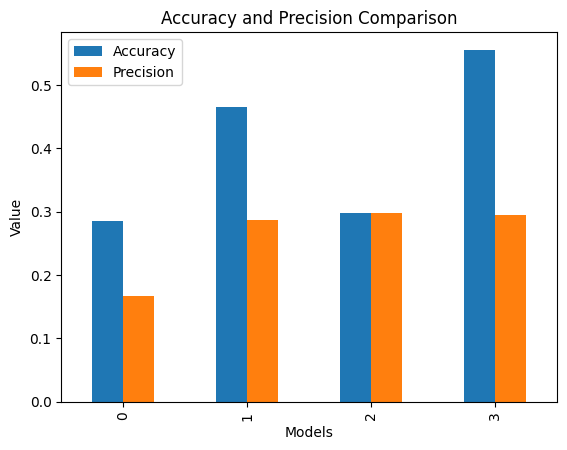

In [473]:
df.plot(x=None, y=['Accuracy', 'Precision'], kind='bar')
plt.xlabel('Models')
plt.ylabel('Value')
plt.title('Accuracy and Precision Comparison')